In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

pd.set_option('display.max_info_columns', 10_000)   # zeigt alle Spaltennamen in info()
pd.set_option('display.max_info_rows', 200_000)     # zeigt Zeileninfo, wenn nötig


# Pfad zur Datei (liegt im gleichen Ordner wie das Notebook)
path = Path("311_Service_Requests.csv")

# Einfacher Import
df = pd.read_csv(path)



/var/folders/pr/6jj9vlcn3zd0w03bd02cj3mw0000gn/T/ipykernel_92691/1408336089.py:16: DtypeWarning: Columns (3,11,12,13,14,20,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


In [15]:

# schneller Blick
df.head()

,SR_NUMBER,SR_TYPE,SR_SHORT_CODE,CREATED_DEPARTMENT,OWNER_DEPARTMENT,STATUS,ORIGIN,CREATED_DATE,LAST_MODIFIED_DATE,CLOSED_DATE,STREET_ADDRESS,CITY,STATE,ZIP_CODE,STREET_NUMBER,STREET_DIRECTION,STREET_NAME,STREET_TYPE,DUPLICATE,LEGACY_RECORD,LEGACY_SR_NUMBER,PARENT_SR_NUMBER,COMMUNITY_AREA,WARD,ELECTRICAL_DISTRICT,ELECTRICITY_GRID,POLICE_SECTOR,POLICE_DISTRICT,POLICE_BEAT,PRECINCT,SANITATION_DIVISION_DAYS,CREATED_HOUR,CREATED_DAY_OF_WEEK,CREATED_MONTH,X_COORDINATE,Y_COORDINATE,LATITUDE,LONGITUDE,LOCATION
0,SR18-00138335,Sidewalk Inspection Request,PBS,NaN,CDOT - Department of Transportation,Completed,Phone Call,10/09/2018 10:29:57 AM,04/30/2025 01:43:50 PM,04/30/2025 01:43:49 PM,10637 S AVERS AVE,CHICAGO,IL,60655.0,10637,S,AVERS,AVE,False,True,CSR18-02873060,NaN,74.0,19.0,13.0,G047,1.0,22.0,2211.0,55.0,Monday,10,3,10,1.152645e+06,1.833643e+06,41.699364,-87.716705,"(41.699364, -87.716705)"
1,SR18-00181082,Street Light Pole Damage Complaint,SFK,NaN,CDOT - Department of Transportation,Completed,Phone Call,11/24/2018 09:40:37 AM,04/03/2025 08:20:07 AM,04/03/2025 08:20:07 AM,7797 W DEVON AVE,CHICAGO,IL,60631.0,7797,W,DEVON,AVE,False,True,CSR18-03215982,NaN,9.0,41.0,1.0,W106,1.0,16.0,1612.0,7.0,Monday,9,7,11,1.123411e+06,1.941859e+06,41.996890,-87.821302,"(41.99689022872318, -87.82130157690764)"
2,SR19-00067091,Street Light Pole Damage Complaint,SFK,NaN,CDOT - Department of Transportation,Completed,Phone Call,01/15/2019 06:35:38 AM,04/03/2025 08:24:00 AM,04/03/2025 08:24:00 AM,5540 W GOODMAN ST,NaN,NaN,NaN,5540,W,GOODMAN,ST,False,False,NaN,NaN,NaN,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,3,1,NaN,NaN,NaN,NaN,NaN
3,SR19-01133849,Sidewalk Inspection Request,PBS,NaN,CDOT - Department of Transportation,Completed,Internet,03/10/2019 11:36:45 AM,04/10/2025 01:26:57 PM,04/10/2025 01:26:57 PM,7340 W BRYN MAWR AVE,NaN,NaN,60631.0,7340,W,BRYN MAWR,AVE,False,False,NaN,NaN,10.0,41.0,1.0,X108,1.0,16.0,1612.0,43.0,Monday,11,1,3,1.126268e+06,1.936780e+06,41.982876,-87.810995,"(41.98287620424388, -87.81099506841116)"
4,SR22-00347974,Sign Repair Request - All Other Signs,PCE,Alderman,CDOT - Department of Transportation,Completed,Alderman's Office,03/03/2022 11:35:19 AM,06/29/2023 09:35:50 AM,06/29/2023 09:35:50 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,5,3,NaN,NaN,NaN,NaN,NaN


In [7]:
from IPython.display import display
display(df.nunique().to_frame('nunique')) #weil sonst die ausgabe gekürzt wird

,nunique
SR_NUMBER,11818315
SR_TYPE,109
SR_SHORT_CODE,109
CREATED_DEPARTMENT,21
OWNER_DEPARTMENT,16
STATUS,5
ORIGIN,46
CREATED_DATE,10957667
LAST_MODIFIED_DATE,4245287
CLOSED_DATE,10108831


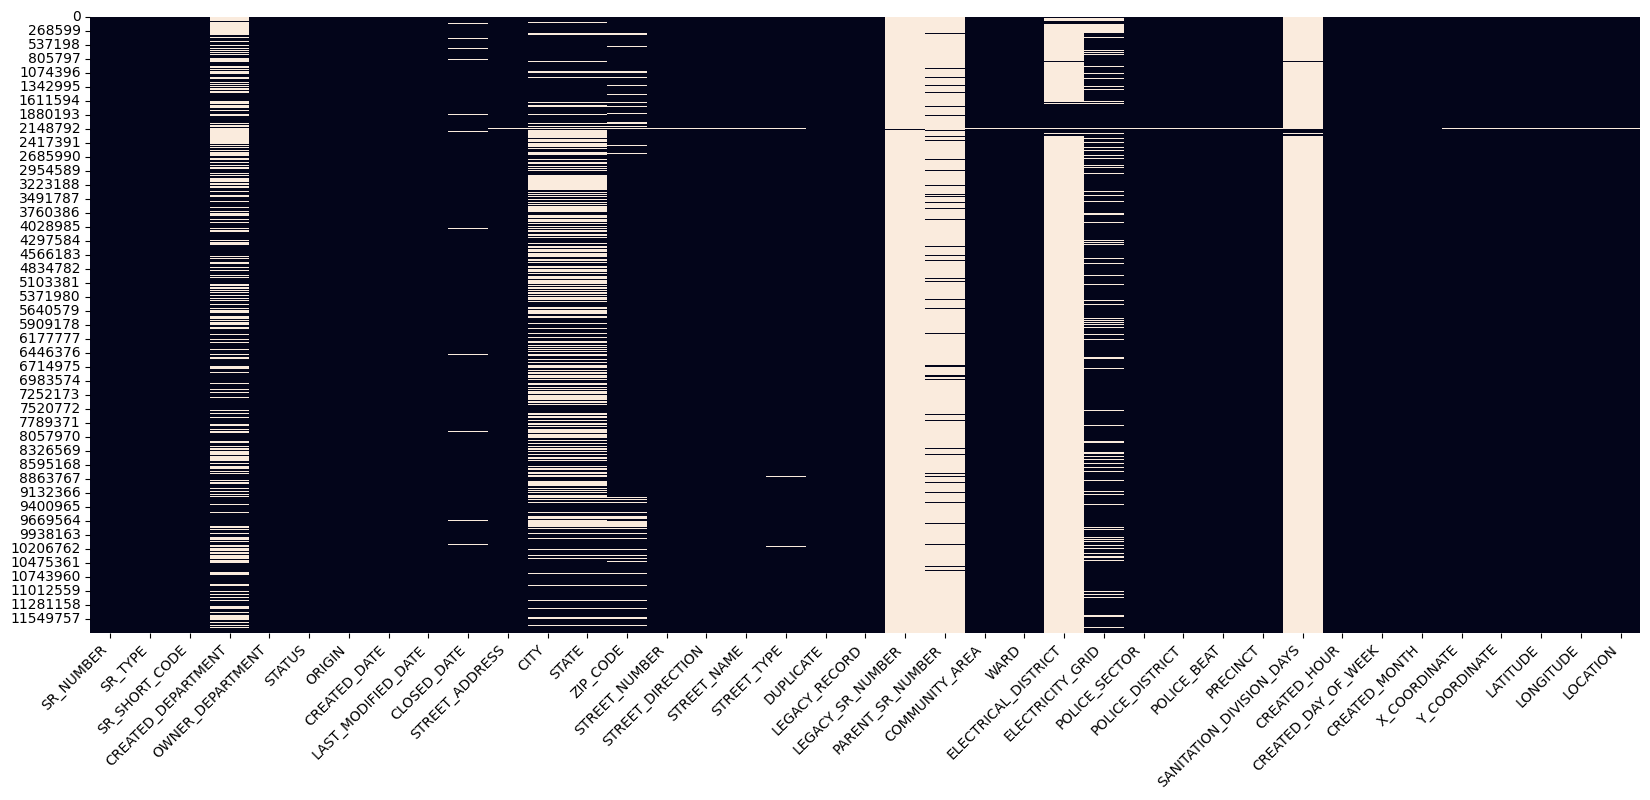

In [9]:
plt.figure(figsize=(20, 8))  # Breite und Höhe anpassen
sns.heatmap(df.isna(), cbar=False)
plt.xticks(rotation=45, ha='right')  # Achsenbeschriftung lesbar machen
plt.show()

In [11]:
df.shape

(11818315, 39)

In [20]:
def show_full_info(df):
    buf = StringIO()
    df.info(buf=buf, verbose=True, max_cols=None, show_counts=True)
    print(buf.getvalue())


show_full_info(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11818315 entries, 0 to 11818314
Data columns (total 39 columns):
 #   Column                    Non-Null Count     Dtype  
---  ------                    --------------     -----  
 0   SR_NUMBER                 11818315 non-null  object 
 1   SR_TYPE                   11818315 non-null  object 
 2   SR_SHORT_CODE             11818315 non-null  object 
 3   CREATED_DEPARTMENT        7021133 non-null   object 
 4   OWNER_DEPARTMENT          11818315 non-null  object 
 5   STATUS                    11818315 non-null  object 
 6   ORIGIN                    11818315 non-null  object 
 7   CREATED_DATE              11818315 non-null  object 
 8   LAST_MODIFIED_DATE        11818315 non-null  object 
 9   CLOSED_DATE               11616601 non-null  object 
 10  STREET_ADDRESS            11807521 non-null  object 
 11  CITY                      7673048 non-null   object 
 12  STATE                     7673048 non-null   object 
 13  ZIP_CODE  

In [1]:
df.describe()

NameError: name 'df' is not defined

2. Bias